In [1]:
import time

import pandas as pd
import platform
import io

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 

import torch
import torch.nn as nn
import torch.optim as optim

import torch.nn as nn
import torch.nn.functional as F

from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import torchvision

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Constants
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
COLOR_CHANNELS = 3
N_CLASSES = 10

In [3]:
# check if cuda is available
cuda = torch.cuda.is_available()
print(cuda)

True


In [4]:
#Load raw CIFAR-10 Dataset and Labels
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = CIFAR10(root='.',
                        train=True,
                        transform=transform,
                        download=True)

test_dataset  = CIFAR10(root='.',
                        train=False,
                        transform=transform,)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .


In [5]:
# check the meta data and batch labels
data_batch_1 = pd.read_pickle(r'./cifar-10-batches-py/data_batch_1')
meta_data    = pd.read_pickle(r'./cifar-10-batches-py/batches.meta')

In [6]:
print(data_batch_1.keys())
print(meta_data.keys())

dict_keys(['batch_label', 'labels', 'data', 'filenames'])
dict_keys(['num_cases_per_batch', 'label_names', 'num_vis'])


In [7]:
one_hot_labels = set(data_batch_1['labels']) # One-hot encoding labels
one_hot_labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [8]:
labels_name = meta_data['label_names']
labels_name

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
label_dict = {k:v for k,v in zip(one_hot_labels, labels_name)} # dict(zip(labels, one_hot))
label_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [10]:
label_dict.get(8)

'ship'

In [11]:
# check the shape of the dataset 
train_data = list(train_dataset)
test_data  = list(test_dataset)
print(f'Train data shape: {len(train_data)}')
print(f'Test data shape:  {len(test_data)}')

Train data shape: 50000
Test data shape:  10000


In [12]:
# check the shape of an image in the train data
image, label = train_data[300]
print(image.shape)
print(label)

torch.Size([3, 32, 32])
2


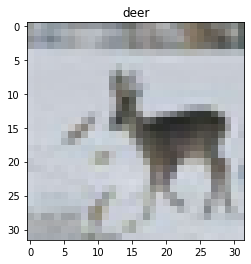

In [13]:
# check some random training images 
def imshow(img, label):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # tensor.permute = np.transpose
    plt.title(''.join(f'{label_dict.get(label)}' )) # show label
    

# plt.imshow(image.permute(1,2,0))
# plt.show()

# get some random training images
image, label = train_data[20]

imshow(image, label)

plt.show()

In [17]:
batch_size = 64         # hyper-parameter 
train_loader = torch.utils.data.DataLoader(
                            dataset = train_dataset, 
                            batch_size = batch_size, 
                            shuffle = True)

test_loader = torch.utils.data.DataLoader(
                            dataset = test_dataset, 
                            batch_size = batch_size, 
                            shuffle = True)
# check the shape of the batches 
dd = list(train_loader)
images, labels = dd[0]
print(images.shape)
print(labels.shape)

torch.Size([64, 3, 32, 32])
torch.Size([64])


In [18]:
class MLP(torch.nn.Module):
  def __init__(self, input_size, n_hidden_units, n_classes):
    super(MLP, self).__init__()

    h1, h2, h3 = n_hidden_units

    # Add Linear layers
    self.fc1 = nn.Linear(input_size,h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.fc4 = nn.Linear(h3, n_classes) # 10 classes
    self.dropout = nn.Dropout(0.25)

  def forward(self, x):
    x = x.view(-1, input_size) # Flatten out the input layer
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.dropout(x)
    x = self.fc4(x)
    return x

In [19]:
# Initialize MLP model
input_size = IMAGE_HEIGHT*IMAGE_WIDTH*COLOR_CHANNELS
n_hidden_units = [512, 256, 128]

mlp_model = MLP(input_size, n_hidden_units, N_CLASSES)

In [20]:
# check the shape of MLP model
output = mlp_model(images)
output.shape

torch.Size([64, 10])